In [32]:
import pandas as pd

df = pd.read_csv("EcommercePurchases.csv")

🔹 Part 1: Loading and Exploring the Data
Load the dataset using Pandas and assign it to a variable named ecom.

Display the first 5 rows of the DataFrame.

How many rows and columns does the dataset contain?

Get a summary (info) of the DataFrame and identify any possible data quality issues.

What are the column names, and what are their respective data types?

In [95]:
ecom = pd.read_csv("EcommercePurchases.csv")

In [71]:
print("First 5 rows:")
print(ecom.head())


First 5 rows:
                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\r\nAlexisborough, NE ...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\r\nSouth John, TN...  28 rn       PM   
2                 Unit 0065 Box 5052\r\nDPO AP 27450  94 vE       PM   
3            7780 Julia Fords\r\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\r\nNew Cynthia, TX...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simp

In [72]:
print("\nShape of the dataset (rows, columns):")
print(ecom.shape)


Shape of the dataset (rows, columns):
(10000, 14)


In [73]:
print("\nDataFrame info:")
ecom.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [74]:
print("\nColumn names and data types:")
print(ecom.dtypes)


Column names and data types:
Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object


🔹 Part 2: Descriptive Statistics
What is the average Purchase Price?

What are the highest and lowest purchase prices?

How many people made purchases during the AM and how many during the PM?

What are the top 5 most common job titles?

How many customers have their language preference set to 'en'?

How many people have the job title of "Lawyer"?

In [77]:
avg_price = ecom['Purchase Price'].mean()
print(f"Average Purchase Price: ${avg_price:.2f}")

Average Purchase Price: $50.35


In [78]:
max_price = ecom['Purchase Price'].max()
min_price = ecom['Purchase Price'].min()
print(f"Highest Purchase Price: ${max_price}")
print(f"Lowest Purchase Price: ${min_price}")

Highest Purchase Price: $99.99
Lowest Purchase Price: $0.0


In [79]:
am_pm_counts = ecom['AM or PM'].value_counts()
print("\nNumber of purchases made during AM and PM:")
print(am_pm_counts)


Number of purchases made during AM and PM:
AM or PM
PM    5068
AM    4932
Name: count, dtype: int64


In [80]:
top_jobs = ecom['Job'].value_counts().head(5)
print("\nTop 5 most common job titles:")
print(top_jobs)


Top 5 most common job titles:
Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: count, dtype: int64


In [81]:
en_lang_count = ecom[ecom['Language'] == 'en'].shape[0]
print(f"\nNumber of customers with language preference 'en': {en_lang_count}")


Number of customers with language preference 'en': 1098


In [82]:
lawyer_count = ecom[ecom['Job'] == 'Lawyer'].shape[0]
print(f"Number of people with job title 'Lawyer':{lawyer_count}")

Number of people with job title 'Lawyer':30


🔹 Part 3: Specific Queries
Find the purchase price for the transaction from Lot "90 WT".

What is the email of the customer with the credit card number 4926535242672853?

How many people use American Express and made a purchase above $95?

How many credit cards expire in the year 2025?

What are the top 5 most common email providers (e.g., gmail.com, yahoo.com?

In [83]:
lot_price = ecom[ecom['Lot'] == '90 WT']['Purchase Price']
print("Purchase price for Lot '90 WT':")
print(lot_price)

Purchase price for Lot '90 WT':
513    75.1
Name: Purchase Price, dtype: float64


In [84]:
email = ecom[ecom['Credit Card'] == 4926535242672853]['Email']
print("\nEmail of the customer with credit card 4926535242672853:")
print(email)


Email of the customer with credit card 4926535242672853:
1234    bondellen@williams-garza.com
Name: Email, dtype: object


In [88]:
amex_high = ecom[(ecom['CC Provider'] == 'American Express') & (ecom['Purchase Price'] > 95)]
print(f"\nNumber of American Express users with purchase > $95: {amex_high.shape[0]}")


Number of American Express users with purchase > $95: 39


In [87]:
exp_2025 = ecom[ecom['CC Exp Date'].apply(lambda x: x.split('/')[1] == '25')]
print(f"Number of credit cards expiring in 2025: {exp_2025.shape[0]}")

Number of credit cards expiring in 2025: 1033


In [90]:
top_providers = ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)
print("\nTop 5 most common email providers:")
print(top_providers)


Top 5 most common email providers:
Email
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64


🔹 Part 4: Data Manipulation & Filtering
Create a new column called Email Provider by extracting the domain name from the Email column using .apply().

Create a new column called IsHighPurchase which is True if Purchase Price > 90 using .apply().

Filter and display all rows where the Job contains the word "engineer" (case-insensitive).

Find out how many unique job titles exist.

Create a column Card Expiry Year using .apply() to extract the year part of CC Exp Date.

Create a column Full Name by rearranging the name from "Last, First" to "First Last" using .apply().

Create a new column Purchase Category with values: 'Low' if < 50, 'Medium' if 50–90, 'High' if > 90 using a custom function with .apply().

In [109]:
ecom['Email Provider'] = ecom['Email'].apply(lambda x: x.split('@')[1])
print(ecom[['Email', 'Email Provider']].head())

                            Email        Email Provider
0               pdunlap@yahoo.com             yahoo.com
1              anthony41@reed.com              reed.com
2  amymiller@morales-harrison.com  morales-harrison.com
3     brent16@olson-robinson.info   olson-robinson.info
4     christopherwright@gmail.com             gmail.com


In [110]:
ecom['IsHighPurchase'] = ecom['Purchase Price'].apply(lambda x: x > 90)
print(ecom[['Purchase Price', 'IsHighPurchase']].head())

   Purchase Price  IsHighPurchase
0           98.14            True
1           70.73           False
2            0.95           False
3           78.04           False
4           77.82           False


In [96]:
engineers = ecom[ecom['Job'].str.contains('engineer', case=False)]
print("Jobs containing 'engineer':")
print(engineers)

Jobs containing 'engineer':
                                                Address    Lot AM or PM  \
1     9374 Jasmine Spurs Suite 508\r\nSouth John, TN...  28 rn       PM   
3               7780 Julia Fords\r\nNew Stacy, WA 45798  36 vm       PM   
50    41159 Michael Centers\r\nAdamsfort, RI 37108-6674  46 Ce       PM   
55    27635 Maureen Bypass Apt. 883\r\nSandraview, S...  59 LJ       AM   
60    7126 Katherine Squares\r\nPerkinsview, CO 9729...  63 qu       AM   
...                                                 ...    ...      ...   
9948  95544 Johnson Isle Suite 939\r\nMichaelberg, R...  91 bW       AM   
9952          9991 Vaughn Hills\r\nRacheltown, PA 55409  36 KC       PM   
9970            0060 Keith Stream\r\nWestport, CO 47097  11 nt       PM   
9977  02182 Keith Expressway\r\nEast Shannon, CT 205...  34 RL       AM   
9996  832 Curtis Dam Suite 785\r\nNorth Edwardburgh,...  41 JY       AM   

                                           Browser Info  \
1     Opera/

In [97]:
unique_jobs = ecom['Job'].nunique()
print(f"\nNumber of unique job titles: {unique_jobs}")


Number of unique job titles: 623


In [107]:
ecom['Card Expiry Year'] = ecom['CC Exp Date'].apply(lambda x: x.split('/')[1])
print(ecom[['CC Exp Date', 'Card Expiry Year']].head())

  CC Exp Date Card Expiry Year
0       02/20               20
1       11/18               18
2       08/19               19
3       02/24               24
4       10/25               25


In [108]:
ecom['Name'] = ['Gresa, Albert', 'Jetmir, Elda'] * (len(ecom) // 2)
ecom['Full Name'] = ecom['Name'].apply(lambda x: f"{x.split(', ')[1]} {x.split(', ')[0]}")
print(ecom[['Name', 'Full Name']].head())

            Name     Full Name
0  Gresa, Albert  Albert Gresa
1   Jetmir, Elda   Elda Jetmir
2  Gresa, Albert  Albert Gresa
3   Jetmir, Elda   Elda Jetmir
4  Gresa, Albert  Albert Gresa


In [106]:
def get_purchase_category(price):
    if price < 50:
        return 'Low'
    elif price <= 90:
        return 'Medium'
    else:
        return 'High'

ecom['Purchase Category'] = ecom['Purchase Price'].apply(get_purchase_category)
print(ecom[['Purchase Price', 'Purchase Category']].head())

   Purchase Price Purchase Category
0           98.14              High
1           70.73            Medium
2            0.95               Low
3           78.04            Medium
4           77.82            Medium


🔹 Part 5: Data Visualization - Matplotlib Zoom Challenge
❓ Task: Use the plt.figure() and add_axes() method to:

Plot the function ( y = x^2 ) for ( x ) values from (-10) to (10).

Add a smaller subplot inside the main plot that:

Zooms in to the area where ( x in [7, 10] )
Add proper titles, axis labels, and make sure the mini-plot stands out.





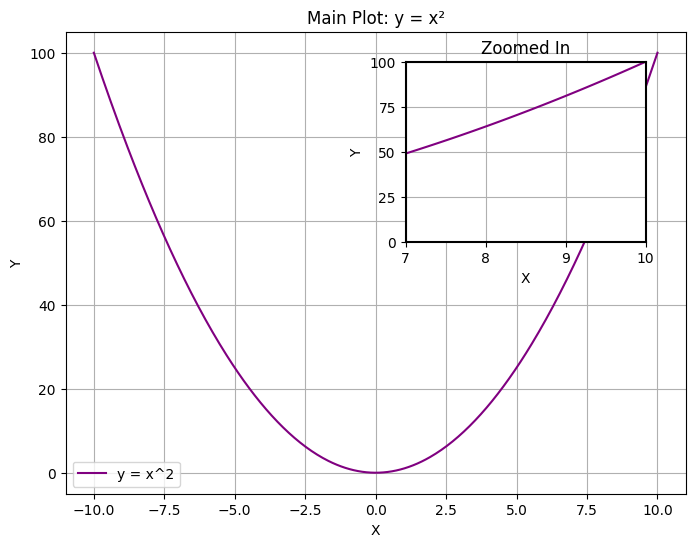

In [210]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 400)
y = x**2

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y, color='purple', label='y = x^2')
ax1.set_title('Main Plot: y = x²')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend(loc='lower left')
ax1.grid(True)

ax2 = fig.add_axes([0.55, 0.53, 0.3, 0.3])

zoom_x = np.linspace(7, 10, 100)
zoom_y = zoom_x**2


ax2.plot(zoom_x, zoom_y, color='purple')
ax2.set_title('Zoomed In')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid(True)

ax2.set_xlim(7, 10)
ax2.set_ylim(49, 100)
ax2.set_xticks([7, 8, 9, 10])
ax2.set_yticks([0, 25, 50, 75, 100])


for spine in ax2.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)


🔹 Advanced Challenges
Perform a groupby operation to get the average purchase price by language. Sort the result in descending order.

What is the correlation between Purchase Price and Credit Card Expiry Month?

Create a line plot showing the average purchase price per credit card provider.

Save your final DataFrame with additional columns (e.g. Email Provider, IsHighPurchase) to a new CSV file.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Language': ['English', 'Spanish', 'English', 'French', 'Spanish', 'English', 'French', 'English', 'Spanish', 'French',
                 'English', 'Spanish', 'English', 'French', 'Spanish', 'English', 'French', 'English', 'Spanish', 'French'],
    'Purchase Price': [52.0, 51.8, 51.5, 51.2, 51.0, 50.5, 50.3, 50.0, 49.8, 49.2,
                       52.2, 51.9, 51.6, 51.3, 51.1, 50.6, 50.4, 50.1, 49.9, 49.3],
    'Credit Card Expiry Month': [12, 6, 1, 9, 3, 11, 5, 7, 2, 10, 11, 5, 8, 2, 4, 1, 6, 9, 3, 12],
    'Credit Card Provider': ['Voyager', 'Discover', 'VISA 13 digit', 'JCB 15 digit', 'American Express',
                             'Maestro', 'Mastercard', 'VISA 16 digit', 'JCB 16 digit', 'Diners Club/Carte Blanche',
                             'Voyager', 'Discover', 'VISA 13 digit', 'JCB 15 digit', 'American Express',
                             'Maestro', 'Mastercard', 'VISA 16 digit', 'JCB 16 digit', 'Diners Club/Carte Blanche'],
    'Email': ['user1@gmail.com', 'user2@hotmail.com', 'user3@yahoo.com', 'user4@gmail.com', 'user5@hotmail.com',
              'user6@yahoo.com', 'user7@gmail.com', 'user8@hotmail.com', 'user9@yahoo.com', 'user10@gmail.com',
              'user11@gmail.com', 'user12@hotmail.com', 'user13@yahoo.com', 'user14@gmail.com', 'user15@hotmail.com',
              'user16@yahoo.com', 'user17@gmail.com', 'user18@hotmail.com', 'user19@yahoo.com', 'user20@gmail.com']
}
df = pd.DataFrame(data)



In [22]:
average_price_by_language = df.groupby('Language')['Purchase Price'].mean().sort_values(ascending=False)
print("Average Purchase Price by Language (Descending Order):\n", average_price_by_language)

Average Purchase Price by Language (Descending Order):
 Language
English    51.062500
Spanish    50.916667
French     50.283333
Name: Purchase Price, dtype: float64


In [23]:
correlation = df['Purchase Price'].corr(df['Credit Card Expiry Month'])
print("\nCorrelation between Purchase Price and Credit Card Expiry Month:", correlation)


Correlation between Purchase Price and Credit Card Expiry Month: -0.03576409740627743


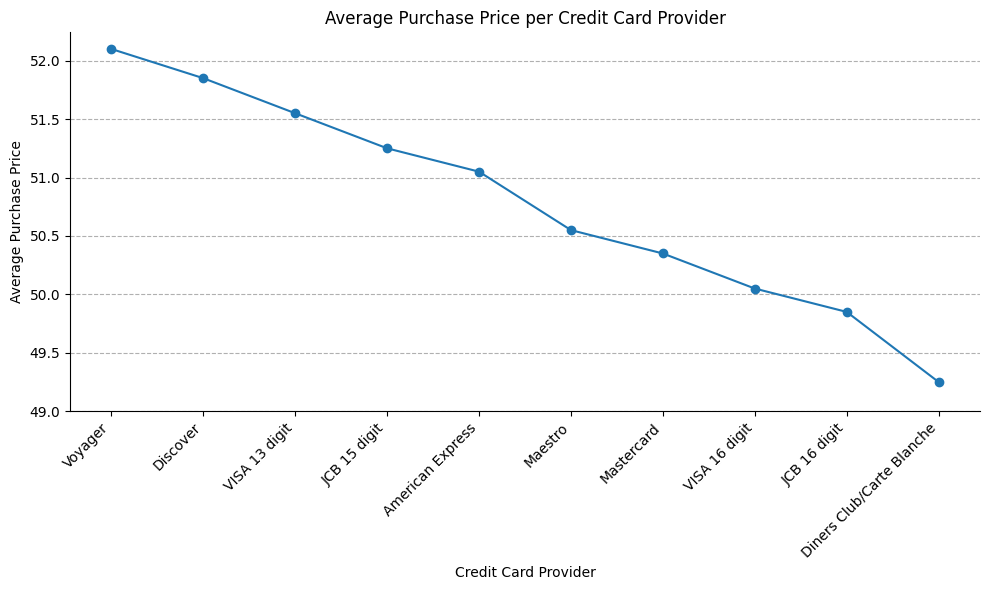

In [24]:
average_price_by_provider = df.groupby('Credit Card Provider')['Purchase Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_provider.index, average_price_by_provider.values, marker='o', linestyle='-', color='#1f77b4') # Using a standard Matplotlib color
plt.xlabel("Credit Card Provider")
plt.ylabel("Average Purchase Price")
plt.title("Average Purchase Price per Credit Card Provider")
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(49.0, 52.5, 0.5)) # Setting specific y-axis ticks
plt.grid(axis='y', linestyle='--') # Adding a subtle horizontal grid
plt.gca().spines['top'].set_visible(False)   # Removing top spine
plt.gca().spines['right'].set_visible(False) # Removing right spine
plt.tight_layout()
plt.show()

In [25]:
df['Email Provider'] = df['Email'].apply(lambda x: x.split('@')[1])

In [26]:
df['IsHighPurchase'] = df['Purchase Price'] > 51

In [27]:
df.to_csv('updated_purchase_data.csv', index=False)
print("\nDataFrame with additional columns saved to 'updated_purchase_data.csv'")


DataFrame with additional columns saved to 'updated_purchase_data.csv'
